<a href="https://colab.research.google.com/github/YeoWoMe/OUTTA-Bootcamp-2024/blob/main/9%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EC%A0%95%EC%97%B0%EC%9A%B0_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **타이타닉 데이터셋 분류 모델 학습 및 평가**

## Kaggle API 인증하고 데이터 다운 받기

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 5.30MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv("test.csv")

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
sub_df = pd.read_csv("gender_submission.csv")

sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
!kaggle competitions submit -c titanic -f gender_submission.csv -m "Message"

100% 3.18k/3.18k [00:00<00:00, 6.07kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

## 데이터 전처리

### 결측치 처리 (직접 처리해볼만한 경우)

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# Embarked가 결측값인 사람들의 Embarked를 'S'로 채우기
train_df.loc[train_df['Embarked'].isna(), 'Embarked'] = 'S'

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
# Embarked가 결측값인 사람들의 Fare를 7.5로 채우기
test_df.loc[test_df['Fare'].isna(), 'Fare'] = 7.5

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 결측치 처리 (나이의 경우)

In [ ]:
# 'Master.'가 포함된 Name의 Age 중앙값 계산
master_median_age = train_df[train_df['Name'].str.contains('Master.', na=False)]['Age'].median()
print(master_median_age)

3.5


In [ ]:
# Age가 결측인 경우 'Master.'가 포함된 Name의 중앙값으로 대체
train_df.loc[train_df['Age'].isna() & train_df['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age
test_df.loc[test_df['Age'].isna() & test_df['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age

In [ ]:
# Pclass와 Sex로 그룹화하여 Age의 중앙값 계산
median_ages = train_df.groupby(['Pclass', 'Sex'])['Age'].median().reset_index()
median_ages = median_ages.rename(columns={'Age': 'Median_Age'})

# Age가 결측인 경우를 찾아 Pclass와 Sex의 Median_Age로 채우기
def fill_age(row):
    if pd.isna(row['Age']):
        return median_ages[(median_ages['Pclass'] == row['Pclass']) & (median_ages['Sex'] == row['Sex'])]['Median_Age'].values[0]
    else:
        return row['Age']

train_df['Age'] = train_df.apply(fill_age, axis=1)
test_df['Age'] = test_df.apply(fill_age, axis=1)

In [ ]:
train_df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### 수치형 데이터의 전처리

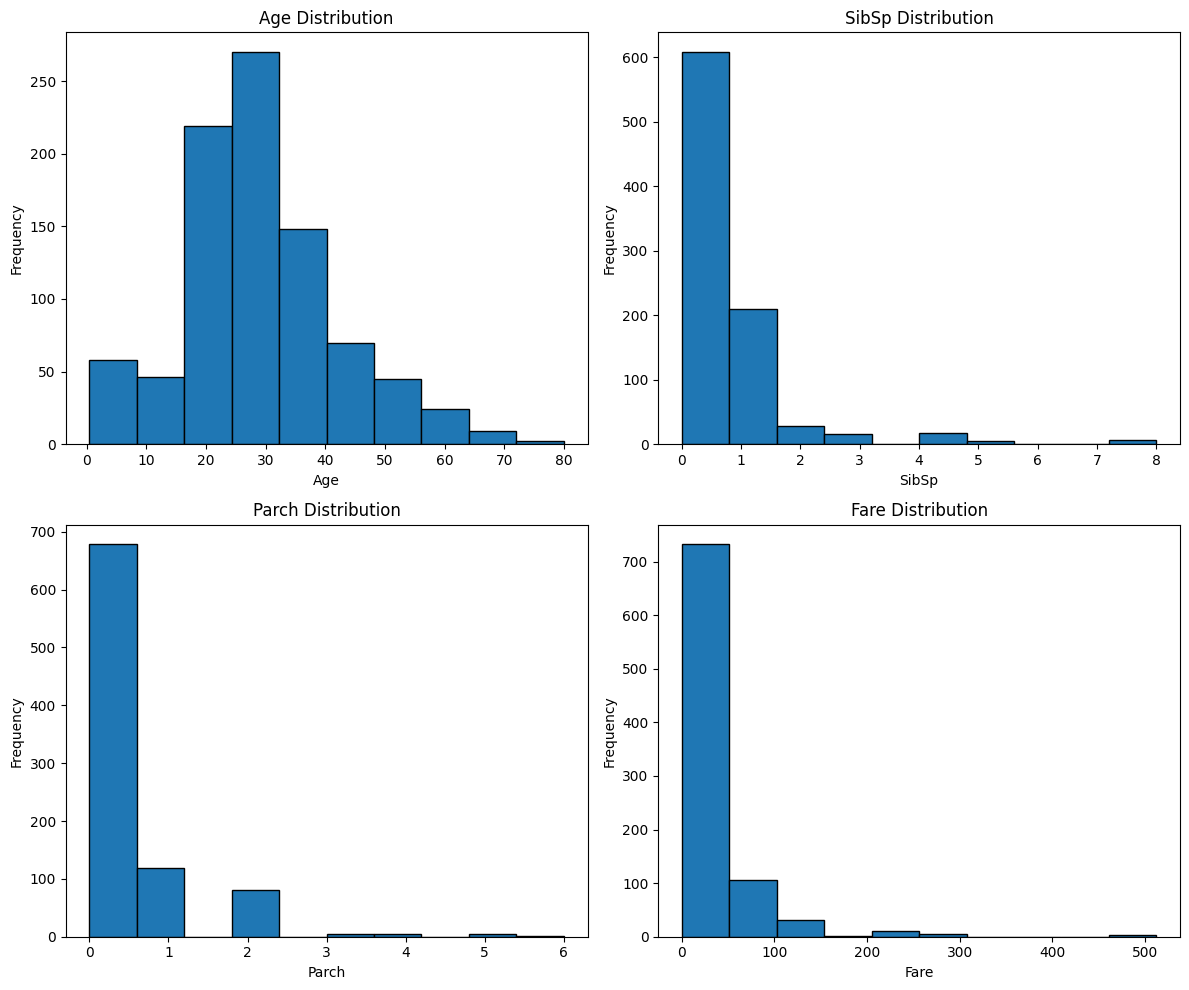

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(train_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(train_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(train_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(train_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

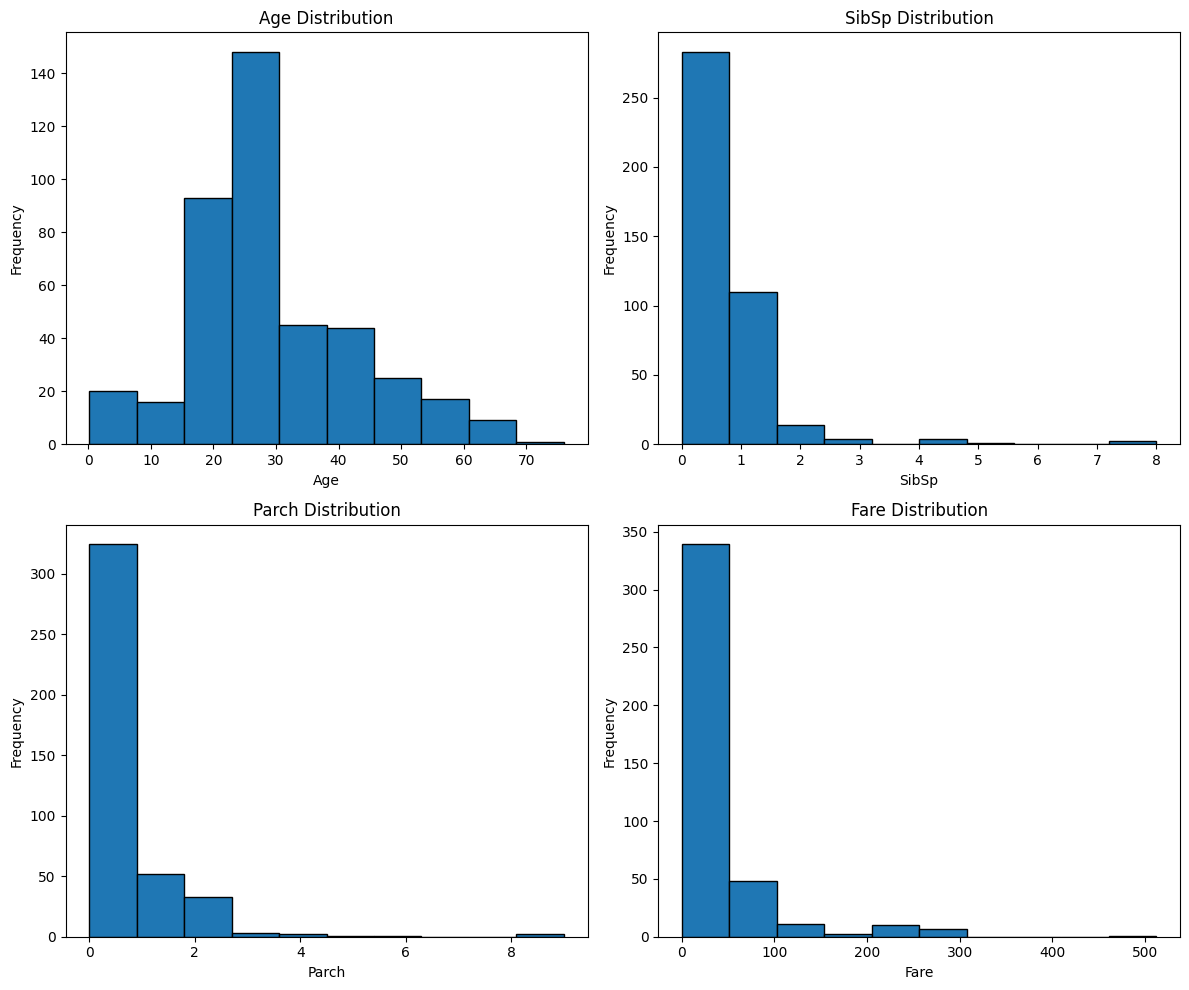

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(test_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(test_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(test_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(test_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# 로그 변환 함수 정의
def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p(x)는 np.log(x+1)과 동일
    return df

# 로그 변환할 컬럼 목록
columns_to_transform = ['SibSp', 'Parch', 'Fare']

# train_df와 test_df에 로그 변환 적용
train_df = log_transform(train_df, columns_to_transform)
test_df = log_transform(test_df, columns_to_transform)


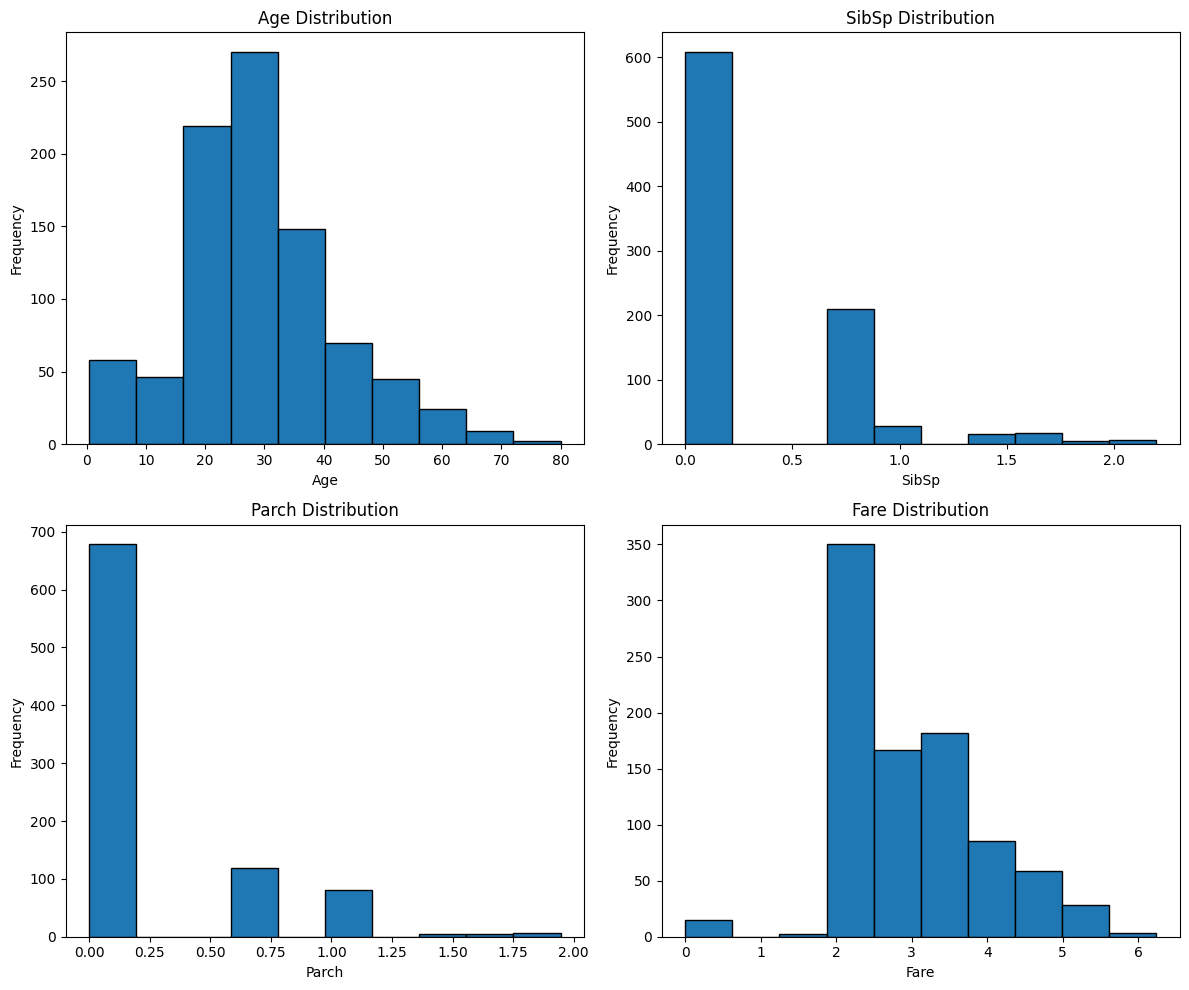

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(train_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(train_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(train_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(train_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

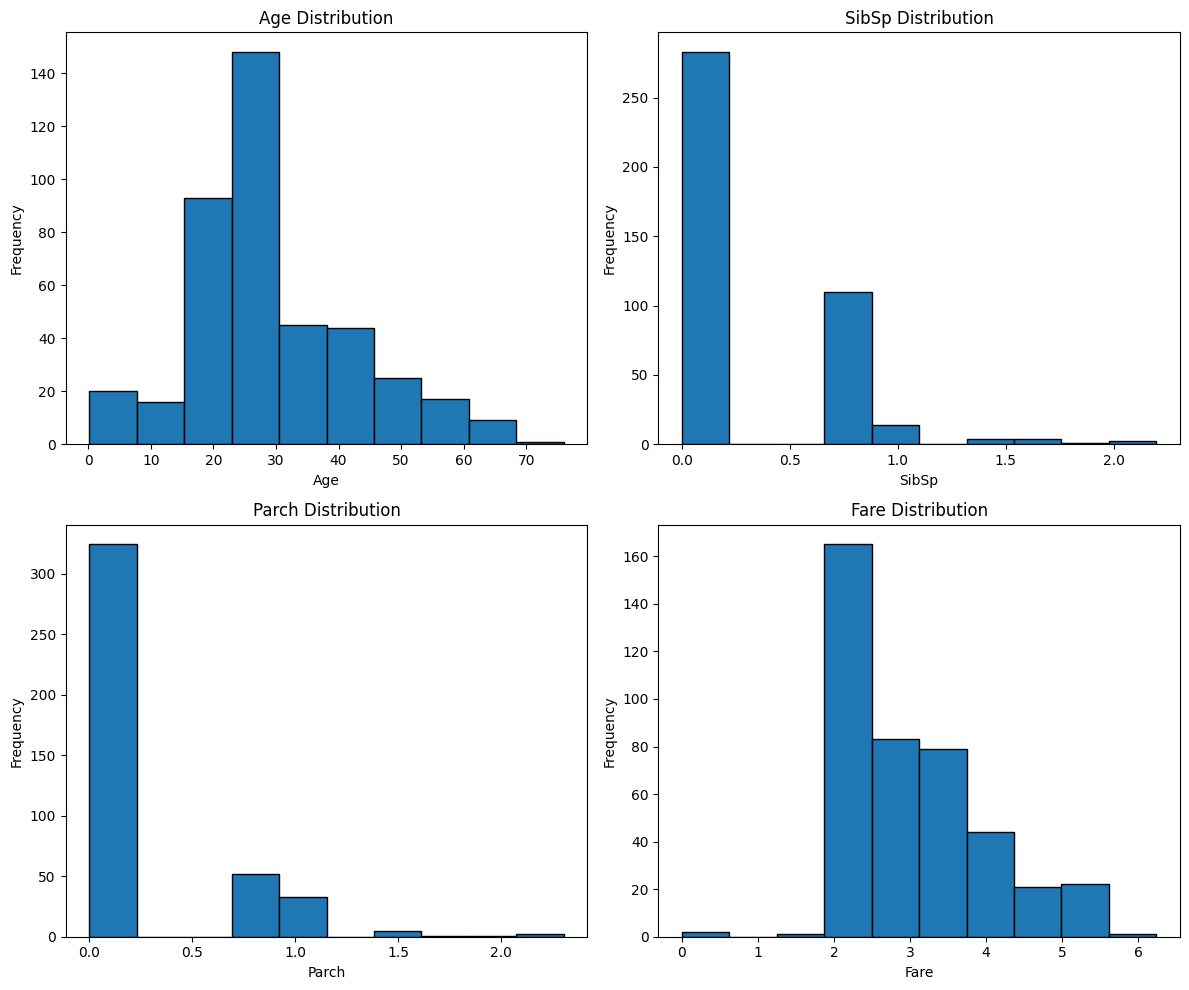

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(test_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(test_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(test_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(test_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 범주형 데이터의 전처리

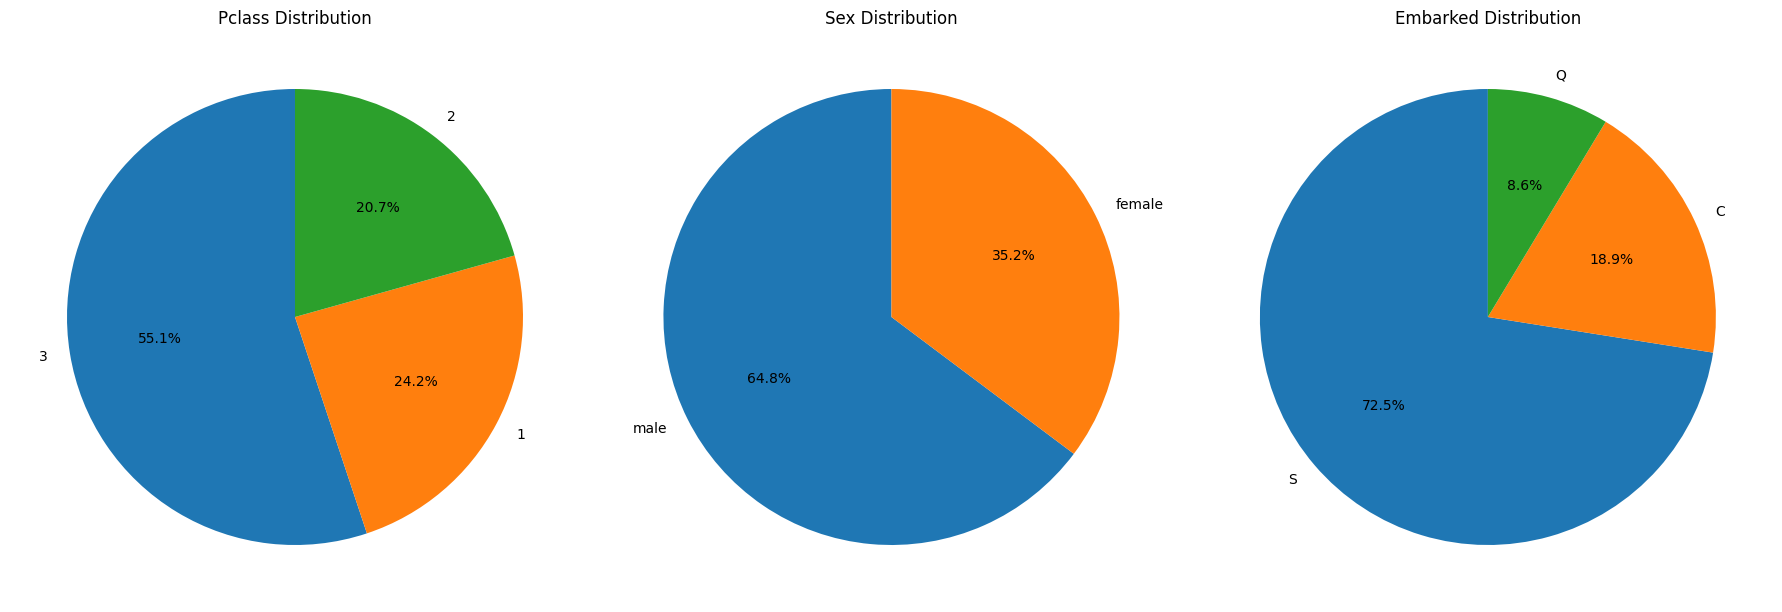

In [ ]:
# 파이 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pclass 파이 차트
pclass_counts = train_df['Pclass'].value_counts()
axes[0].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pclass Distribution')

# Sex 파이 차트
sex_counts = train_df['Sex'].value_counts()
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sex Distribution')

# Embarked 파이 차트
embarked_counts = train_df['Embarked'].value_counts()
axes[2].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Embarked Distribution')

plt.tight_layout()
plt.show()

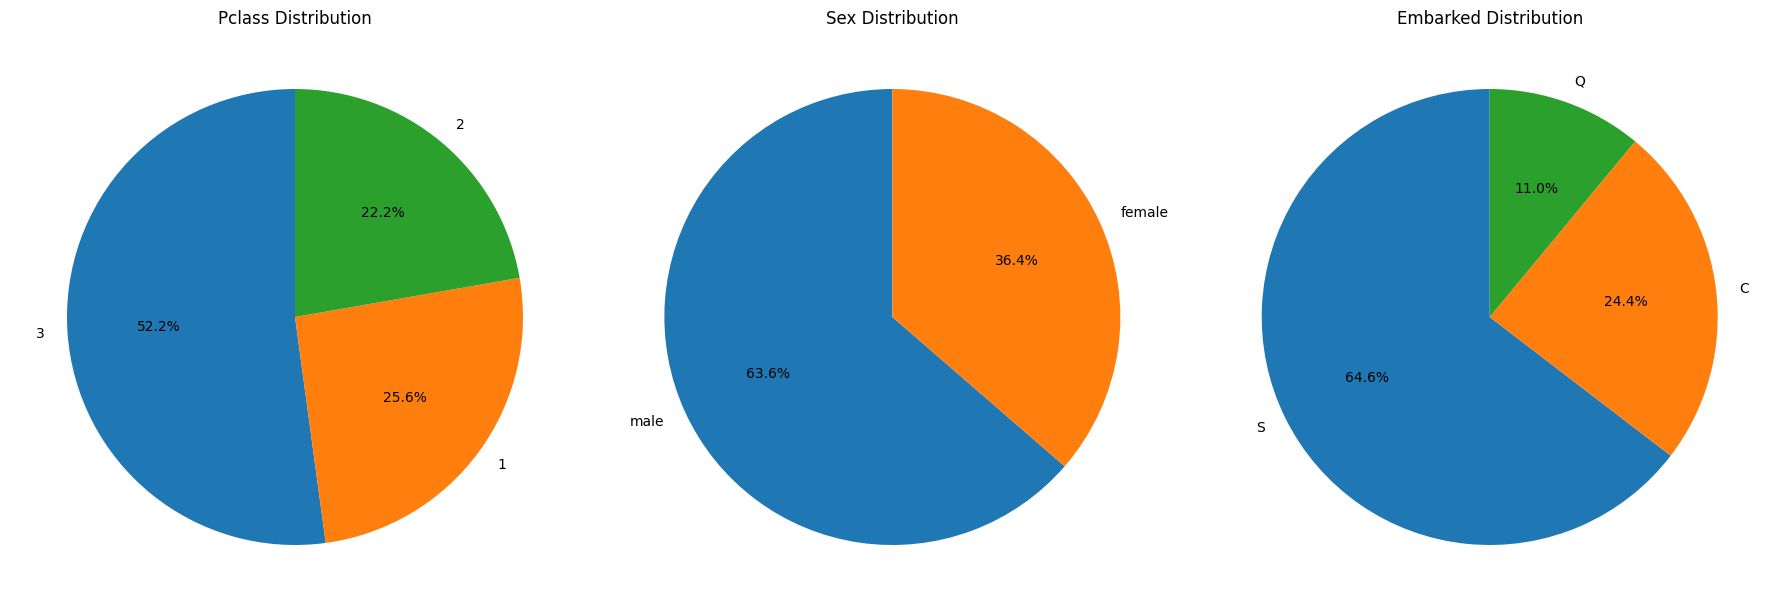

In [ ]:
# 파이 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pclass 파이 차트
pclass_counts = test_df['Pclass'].value_counts()
axes[0].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pclass Distribution')

# Sex 파이 차트
sex_counts = test_df['Sex'].value_counts()
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sex Distribution')

# Embarked 파이 차트
embarked_counts = test_df['Embarked'].value_counts()
axes[2].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Embarked Distribution')

plt.tight_layout()
plt.show()

### 최종 전처리

In [ ]:
train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
# Pclass, Sex, Embarked 컬럼을 원-핫 인코딩하여 정수형으로 변환
def one_hot_encode(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column, dtype = int)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

# 인코딩할 컬럼 목록
columns_to_encode = ['Pclass', 'Sex', 'Embarked']

# train_df와 test_df에 원-핫 인코딩 적용
train_df_encoded = one_hot_encode(train_df, columns_to_encode)
test_df_encoded = one_hot_encode(test_df, columns_to_encode)

## 모델 학습 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_df_encoded.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'passenger',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId','Pclass_3','Sex_female','Embarked_C','SibSp', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

------------------------------------------------------------
Model: KNN
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

------------------------------------------------------------
Model: SVM
Accuracy: 0.6201117318435754
Classification Report:
              preci

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

------------------------------------------------------------
Model: KNN
Accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

------------------------------------------------------------
Model: SVM
Accuracy: 0.6089385474860335
Classification Report:
              preci

### Logistic Regression

In [ ]:
import statsmodels.api as sm

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Sex_female', 'Pclass_3'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습 및 결과 요약
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Statsmodels를 사용하여 요약 결과 출력
X_train_sm = sm.add_constant(X_train)  # 절편 추가
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

print(result.summary())

# 예측 및 평가
y_pred = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Optimization terminated successfully.
         Current function value: 0.450323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                  0.3200
Time:                        16:23:15   Log-Likelihood:                -320.63
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 2.469e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6517      0.514      1.268      0.205      -0.356       1.659
Age           -0.0339      0.

In [ ]:
import statsmodels.api as sm

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Sex_female', 'Pclass_3', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습 및 결과 요약
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Statsmodels를 사용하여 요약 결과 출력
X_train_sm = sm.add_constant(X_train)  # 절편 추가
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

print(result.summary())

# 예측 및 평가
y_pred = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Optimization terminated successfully.
         Current function value: 0.451193
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.3187
Time:                        10:40:30   Log-Likelihood:                -321.25
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 6.134e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7096      0.501      1.415      0.157      -0.273       1.692
Age           -0.0326      0.

### KNN

**Cross-Validation**

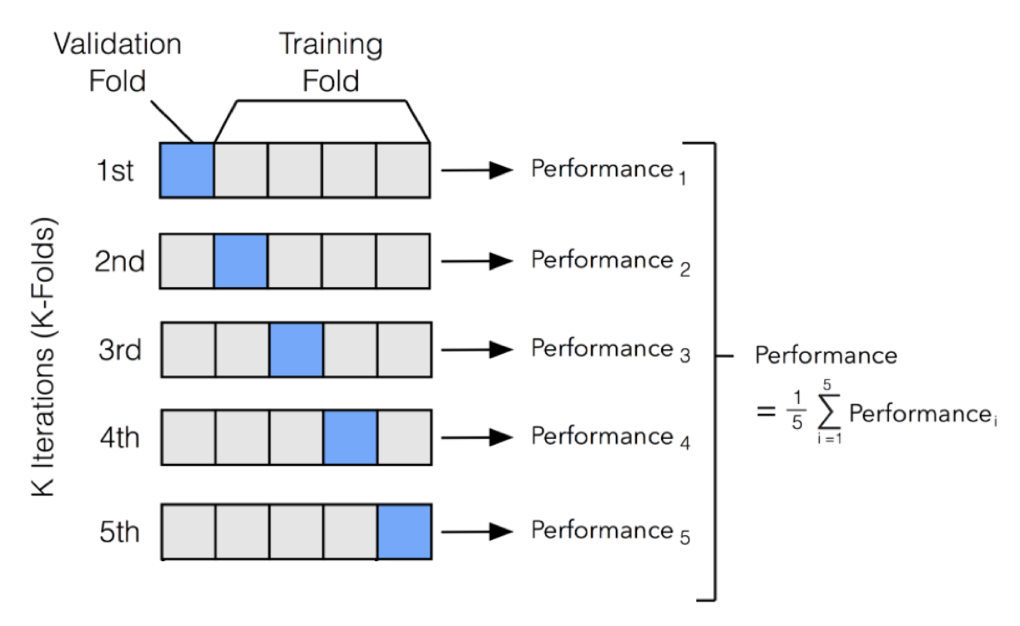

In [ ]:
from sklearn.model_selection import GridSearchCV

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

# KNN 모델 설정
knn = KNeighborsClassifier()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"KNN Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3}
KNN Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### SVM

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# SVM 모델 설정
svm = SVC()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"SVM Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



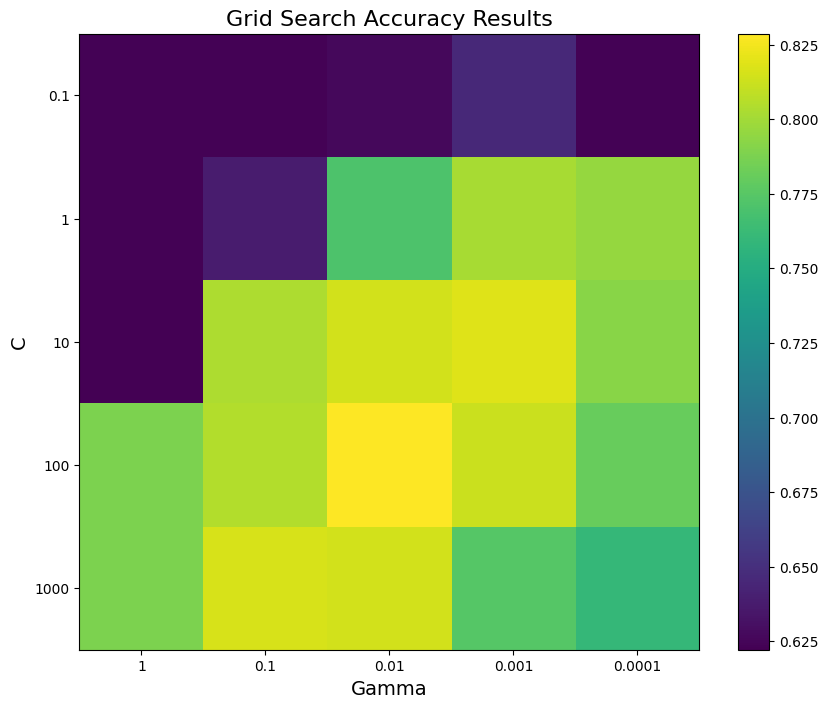

In [ ]:
# GridSearchCV 결과에서 각 하이퍼파라미터 조합에 대한 정확도 추출
results = pd.DataFrame(grid_search.cv_results_)

# 결과 시각화
pivot_table = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("Grid Search Accuracy Results", fontsize=16)
plt.xlabel("Gamma", fontsize=14)
plt.ylabel("C", fontsize=14)
plt.imshow(pivot_table, interpolation="nearest", cmap="viridis", aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'])
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()

### Decision Tree

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Decision Tree 모델 설정
dt = DecisionTreeClassifier()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



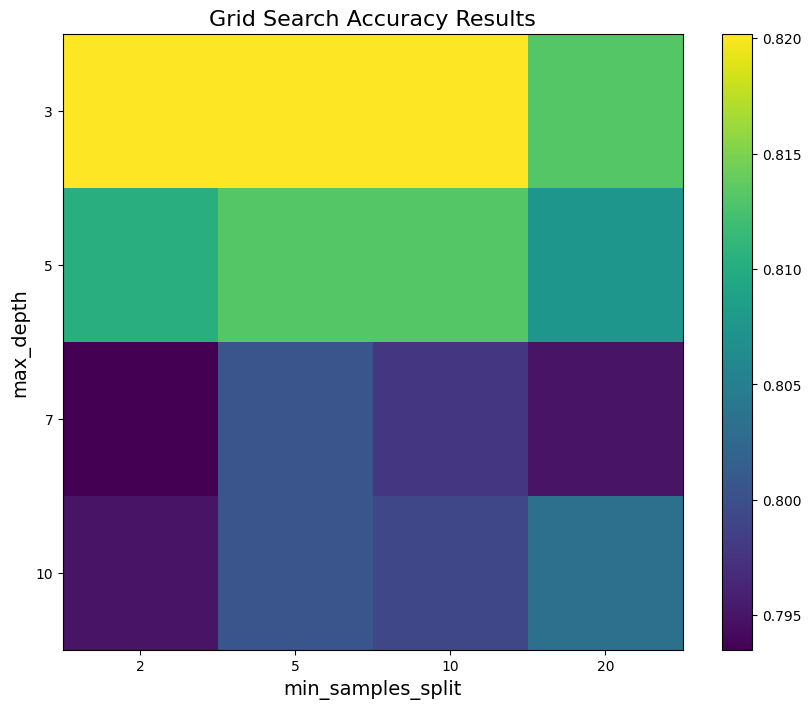

In [ ]:
# GridSearchCV 결과에서 각 하이퍼파라미터 조합에 대한 정확도 추출
results = pd.DataFrame(grid_search.cv_results_)

# 결과 시각화
pivot_table = results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("Grid Search Accuracy Results", fontsize=16)
plt.xlabel("min_samples_split", fontsize=14)
plt.ylabel("max_depth", fontsize=14)
plt.imshow(pivot_table, interpolation="nearest", cmap="viridis", aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.show()

Decision Tree Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



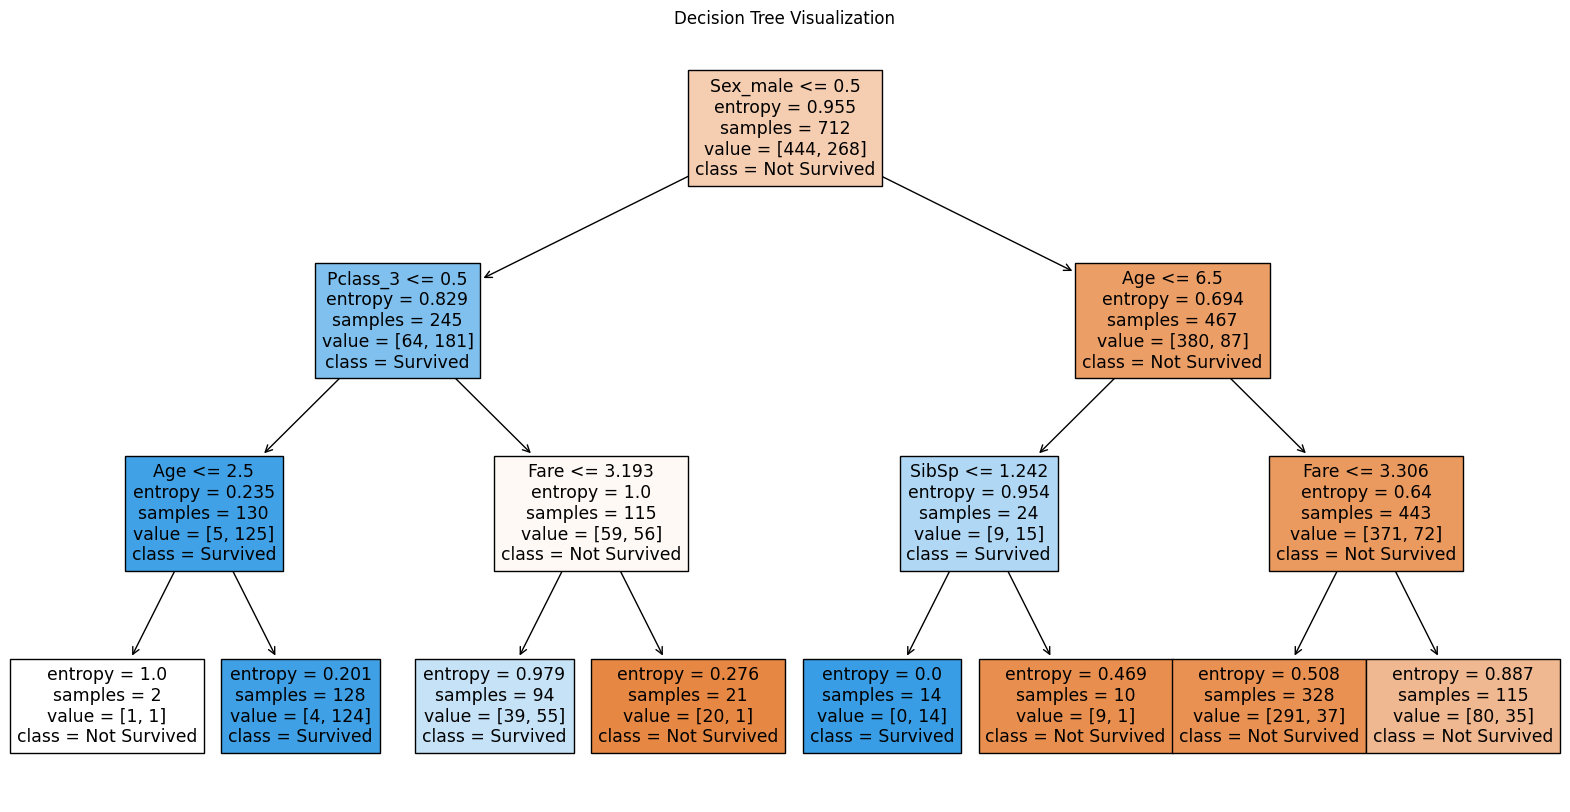

In [ ]:
from sklearn.tree import plot_tree

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 설정 및 학습
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
dt.fit(X_train, y_train)

# 예측 및 평가
y_pred = dt.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId','Pclass_3','Sex_female','Embarked_C','SibSp', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Random Forest 모델 설정
rf = RandomForestClassifier()

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    rf.set_params(**params)
    rf.fit(X_train, y_train)
    score = rf.score(X_valid, y_valid)
    if score > best_score: # 최고점수를 계속적으로 갱신하는 형식
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print("Classification Report:")
print(report)


100%|██████████| 48/48 [00:31<00:00,  1.52it/s]


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy: 0.8324022346368715
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



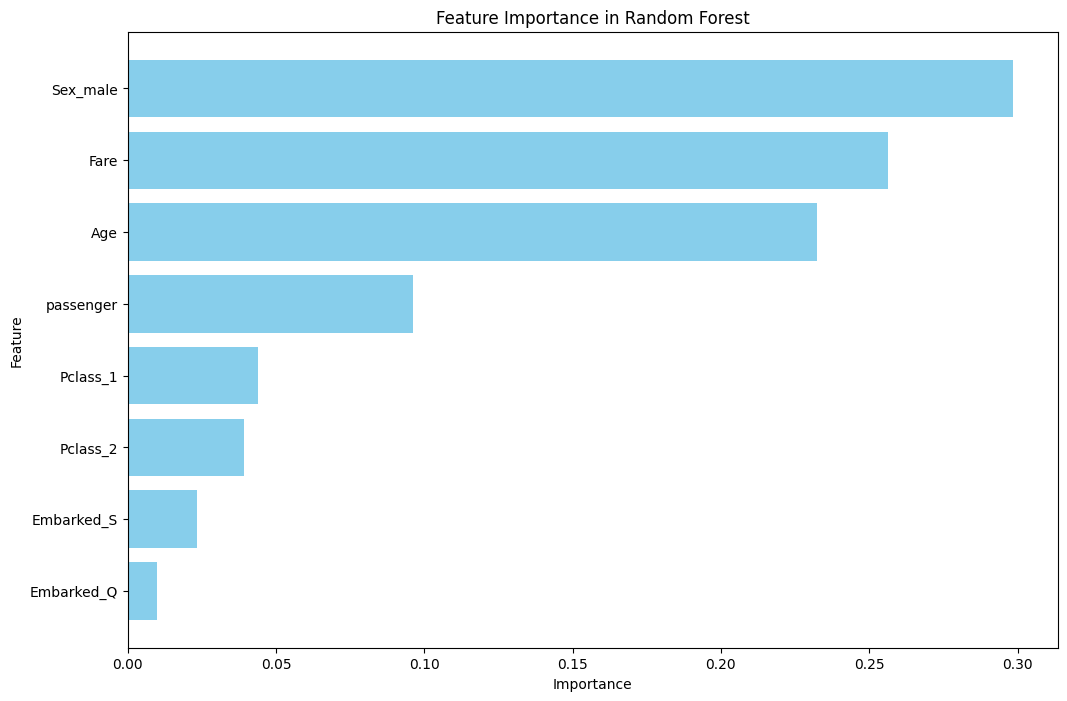

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId','Pclass_3','Sex_female','Embarked_C','SibSp', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 설정 및 학습
rf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=300)
rf.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances = rf.feature_importances_
features = X.columns

# 특성 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 특성 중요도가 높은 순으로 정렬되도록 y축 반전
plt.show()

In [ ]:
rf.predict(X_test)

### Gradient Boosting

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Gradient Boosting 모델 설정
gb = GradientBoostingClassifier()

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    gb.set_params(**params)
    gb.fit(X_train, y_train)
    score = gb.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")
print("Classification Report:")
print(report)

100%|██████████| 27/27 [00:22<00:00,  1.18it/s]


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Accuracy: 0.8547486033519553
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.85      0.78      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179



### XGBoost

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# XGBoost 모델 설정
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    xgb.set_params(**params)
    xgb.fit(X_train, y_train)
    score = xgb.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print("Classification Report:")
print(report)

100%|██████████| 27/27 [00:02<00:00,  9.48it/s]


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
XGBoost Accuracy: 0.8491620111731844
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



### LightGBM

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리 (정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch']))

# train/validation set 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, train_df_encoded['Survived'], test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [7, 15, 31],
    'min_child_samples': [5, 10, 20]
}

# LightGBM 모델 설정
lgbm = LGBMClassifier(verbosity=-1)

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid), desc="Hyperparameter tuning")

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    lgbm.set_params(**params)
    lgbm.fit(X_train, y_train)
    score = lgbm.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = LGBMClassifier(**best_params, verbosity=-1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"LightGBM Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Hyperparameter tuning: 100%|██████████| 243/243 [00:22<00:00, 10.57it/s]

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31}
LightGBM Accuracy: 0.8659217877094972
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       105
           1       0.84      0.84      0.84        74

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



## 모델 선택 및 제출

In [ ]:
train_df_final = train_df_encoded.drop(['Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_3', 'Parch'], axis = 1)

In [ ]:
train_df_final

,PassengerId,Survived,Age,SibSp,Fare,Pclass_1,Pclass_2,Sex_male
0,1,0,22.0,0.693147,2.110213,0,0,1
1,2,1,38.0,0.693147,4.280593,1,0,0
2,3,1,26.0,0.000000,2.188856,0,0,0
3,4,1,35.0,0.693147,3.990834,1,0,0
4,5,0,35.0,0.000000,2.202765,0,0,1
...,...,...,...,...,...,...,...,...
886,887,0,27.0,0.000000,2.639057,0,1,1
887,888,1,19.0,0.000000,3.433987,1,0,0
888,889,0,21.5,0.693147,3.196630,0,0,0
889,890,1,26.0,0.000000,3.433987,1,0,1


In [ ]:
submission_df = test_df_encoded.drop(columns=['Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch', 'Sex_female', 'Pclass_3'])

In [ ]:
submission_df

,PassengerId,Age,SibSp,Fare,Pclass_1,Pclass_2,Sex_male
0,892,34.5,0.000000,2.178064,0,0,1
1,893,47.0,0.693147,2.079442,0,0,0
2,894,62.0,0.000000,2.369075,0,1,1
3,895,27.0,0.000000,2.268252,0,0,1
4,896,22.0,0.693147,2.586824,0,0,0
...,...,...,...,...,...,...,...
413,1305,25.0,0.000000,2.202765,0,0,1
414,1306,39.0,0.000000,4.699571,1,0,0
415,1307,38.5,0.000000,2.110213,0,0,1
416,1308,25.0,0.000000,2.202765,0,0,1


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

# Feature와 Target 분리
X = train_df_final.drop(columns=['PassengerId', 'Survived'])
y = train_df_final['Survived']

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
submission_scaled = scaler.transform(submission_df.drop(columns=['PassengerId']))

# 개별 모델 설정
models = [
    ('lr', LogisticRegression(max_iter=200)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3)),
    ('svm', SVC(C=100, gamma=0.01, kernel='rbf')),
    ('dt', DecisionTreeClassifier(max_depth=3, min_samples_split=2)),
    ('rf', RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200)),
    ('xgb', XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=200, use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(verbosity = -1, learning_rate=0.1, max_depth=5, min_child_samples=20, n_estimators=200, num_leaves=31))
]

# Voting Classifier 설정
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train_scaled, y)

# 최적의 모델로 submission_df 예측 수행
submission_predictions = voting_clf.predict(submission_scaled)

# 결과 데이터프레임 생성
submission_result = pd.DataFrame({
    'PassengerId': submission_df['PassengerId'],
    'Survived': submission_predictions
})

In [ ]:
submission_result.to_csv("submission_result.csv", index = False)

In [ ]:
!kaggle competitions submit -c titanic -f submission_result.csv -m "Message"

100% 2.77k/2.77k [00:01<00:00, 2.74kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

# **과제**

실습 코드 및 수업에서 배운 내용을 참조하여, 정확도 **77.272%를 초과**하는 모델을 만들고 제출하세요. Kaggle 결과 화면을 캡쳐하고 이곳에 업로드 해주세요.

아래는 해볼만한 실험 과정 예시입니다.
1. 전처리 과정
  *   Age의 전처리를 조금 더 엄밀히 할 수 있다.
  *   수치형 데이터의 경우 Outlier를 탐지해서 이산화하거나 학습에서 제거할 수 있다.
  *   범주형 데이터의 경우 Embarked를 학습에 이용해볼 수도 있다.
  *   Feature Engineering 과정을 통해서 학습에 유의한 새로운 변수를 생성할 수도 있다.
2. 모델 학습 및 평가 과정
  *  각 모델에 대해 Hyperparameter Tuning 과정을 좀 더 엄밀하게 할 수 있다.
  *  각 모델에 대해 고려하는 Hyperparameter를 더 다양하게 해볼 수 있다.
3. 모델 선택 과정
  * Voting Classifier를 사용하지 않고 가장 좋았던 모델 하나만으로 해볼 수 있다.
  * 모델 선정을 여러가지 모델을 개별적으로 테스트 해볼 수 있다.

그 외에도 많은 방법론이 있을 수 있습니다. 직접 이것저것 해보면서 Kaggle에 제출하고, 머신러닝 모델 학습 경험을 가져보기 바랍니다.


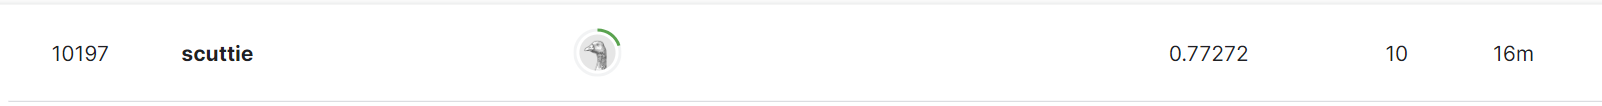

**평가 기준**
1. Kaggle 제출 화면을 캡쳐해서 해당 코드에 첨부했는가? (올리면 20점, 아니면 0점)
2. Kaggle 제출 정확도가 77.272% 초과인가? (초과했으면 20점, 아니면 0점)
3. 전처리/학습&평가/모델 선정 과정에 대한 설명이 나름의 근거가 있으면서 흐름이 논리적인가? (각 20점 만점으로 정성 평가. 60점 만점.)

**보너스 점수**
1. 데이터반 Kaggle 제출 정확도 상위 Percentile에 따라 추가 점수 부여
  * 95th Percentile: 20점
  * 90th Percentile: 15점
  * 85th Percentile: 10점
  * 80th Percentile: 5점
  * 단, Cheating이 확인되었을 시 해당 실습은 예외 없이 0점 처리.

**Cheating의 기준**
* Test Set에 대해서 생존 여부를 검색해서 채워넣었음.
* 정답지를 다른 소스에서 미리 확인하고 생존 여부 정답지로 채워넣었음.
* 그 외 Test Set과 Survived 여부에 대한 사전 정보를 데이터에 주입했다면 Cheating

**Cheating이 아닌 기준**
* Test Set은 전처리 이외에는 관여되면 안된다.
* Train Set과 Test Set에는 같은 전처리 과정이 적용되어야 한다.
* 머신러닝 모델을 사용하여 학습 및 평가 과정이 있어야 한다.

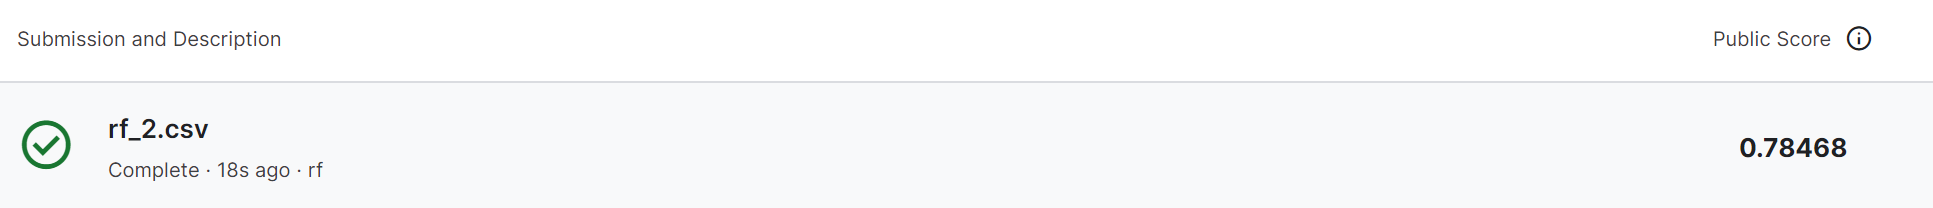

## 추가적인 전처리
- 동승자 column 만들기: SibSP, Parch 합치기 -> SibSP, Parch 삭제(로그변환도 하지 않기)
- Fare에 이상치: 500 파운드 300이하로 맞춰주기
- Age 결측치: Title 추출 후 중앙값으로 대치
- Fare: log scaling / Age: StandardScaling / Passenger: minmax

In [ ]:
#동승자 column 파생변수 생성
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x782f2365b190>,
 'caps': [<matplotlib.lines.Line2D at 0x782f2365b6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x782f2365aef0>],
 'medians': [<matplotlib.lines.Line2D at 0x782f2365bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x782f2365beb0>],
 'means': []}

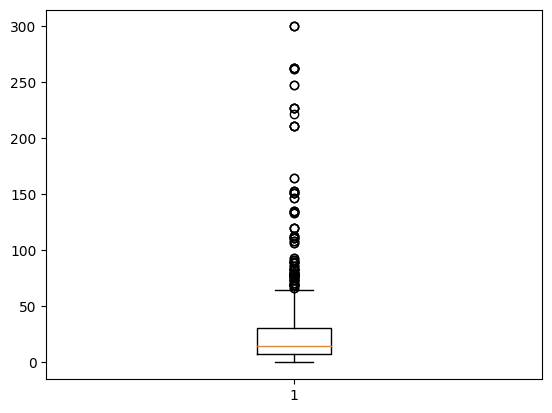

In [ ]:

plt.boxplot(train_df['Fare'])

In [ ]:
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
train_df[train_df['Age'].isna()]['Title'].value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [ ]:
# 'Title' 별로 'Age'의 평균 계산
title_age_mean = train_df.groupby('Title')['Age'].mean()

# 'Age'의 결측값을 해당 타이틀의 평균 나이로 채우기 위한 함수
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    else:
        return row['Age']

# 'Age' 열의 결측값 채우기
train_df['Age'] = train_df.apply(fill_age, axis=1)
test_df['Age'] = test_df.apply(fill_age, axis=1)

# 결과 확인
print(train_df[['Title', 'Age']].head(10))

    Title       Age
0      Mr  22.00000
1     Mrs  38.00000
2    Miss  26.00000
3     Mrs  35.00000
4      Mr  35.00000
5      Mr  32.36809
6      Mr  54.00000
7  Master   2.00000
8     Mrs  27.00000
9     Mrs  14.00000


In [ ]:
#동승자 column 파생변수 생성
train_df['passenger'] = train_df['Parch'] + train_df['SibSp']
test_df['passenger'] = test_df['Parch'] + test_df['SibSp']

(array([537., 161., 102.,  29.,  15.,  22.,  12.,   6.,   0.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

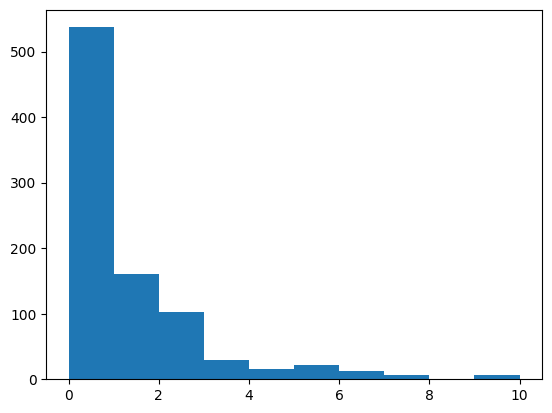

In [ ]:
plt.hist(train_df['passenger'])

(array([253.,  74.,  57.,  14.,   7.,   3.,   4.,   2.,   0.,   4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

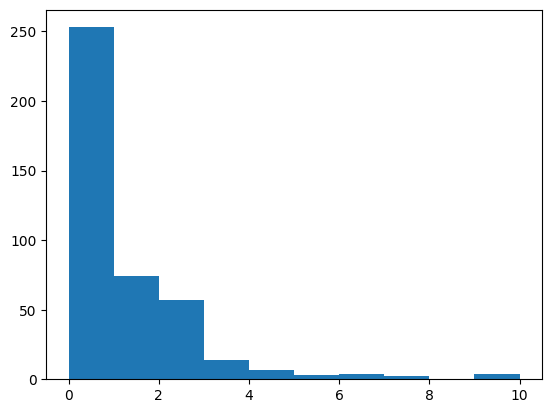

In [ ]:
plt.hist(test_df['passenger'])

In [ ]:
#Fare 이상치 300으로 맞춰주기
train_df.loc[train_df['Fare']>500,'Fare'] =300
test_df.loc[test_df['Fare']>500,'Fare'] =300

# 300으로 맞춘 후 log 변환
train_df['Fare'] = np.log1p(train_df['Fare'])
test_df['Fare'] = np.log1p(test_df['Fare'])

In [ ]:
# Age, passenger(동승자) scaling
# Age: StandardScaling, passenger: MinMaxScaling로 표준화 진행

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 정규화
sscaler = StandardScaler()
mscaler = MinMaxScaler()

train_df['Age'] = sscaler.fit_transform(train_df[['Age']])
test_df['Age'] = sscaler.transform(test_df[['Age']].values.reshape(-1, 1))


# MinMaxScaler를 사용하여 'PassengerId' 열 표준화
train_df['passenger'] = mscaler.fit_transform(train_df[['passenger']])
test_df['passenger'] = mscaler.transform(test_df[['passenger']].values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
train_df.drop(['PassengerId','Title','Name','Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['PassengerId','Title','Name','Ticket','Cabin'],axis=1,inplace=True)

# Pclass, Sex, Embarked 컬럼을 원-핫 인코딩하여 정수형으로 변환
def one_hot_encode(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column, dtype = int)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

# 인코딩할 컬럼 목록
columns_to_encode = ['Pclass', 'Sex', 'Embarked']

# train_df와 test_df에 원-핫 인코딩 적용
train_df_encoded = one_hot_encode(train_df, columns_to_encode)
test_df_encoded = one_hot_encode(test_df, columns_to_encode)

In [ ]:
train_df_encoded.head()

,Survived,Age,SibSp,Parch,Fare,passenger,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.584387,1,0,2.110213,0.1,0,0,1,0,1,0,0,1
1,1,0.621365,1,0,4.280593,0.1,1,0,0,1,0,1,0,0
2,1,-0.282949,0,0,2.188856,0.0,0,0,1,1,0,0,0,1
3,1,0.395286,1,0,3.990834,0.1,1,0,0,1,0,0,0,1
4,0,0.395286,0,0,2.202765,0.0,0,0,1,0,1,0,0,1


In [ ]:
test_df_encoded.head()

,Age,SibSp,Parch,Fare,passenger,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.357607,0,0,2.178064,0.0,0,0,1,0,1,0,1,0
1,1.299600,1,0,2.079442,0.1,0,0,1,1,0,0,0,1
2,2.429993,0,0,2.369075,0.0,0,1,0,0,1,0,1,0
3,-0.207590,0,0,2.268252,0.0,0,0,1,0,1,0,0,1
4,-0.584387,1,1,2.586824,0.2,0,0,1,1,0,0,0,1


## 모델링

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived','Sex_female','SibSp', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Random Forest 모델 설정
rf = RandomForestClassifier()

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    rf.set_params(**params)
    rf.fit(X_train, y_train)
    score = rf.score(X_valid, y_valid)
    if score > best_score: # 최고점수를 계속적으로 갱신하는 형식
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print("Classification Report:")
print(report)



 21%|██        | 10/48 [02:45<10:30, 16.60s/it]

100%|██████████| 48/48 [00:20<00:00,  2.31it/s]


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.8547486033519553
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.85      0.78      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179



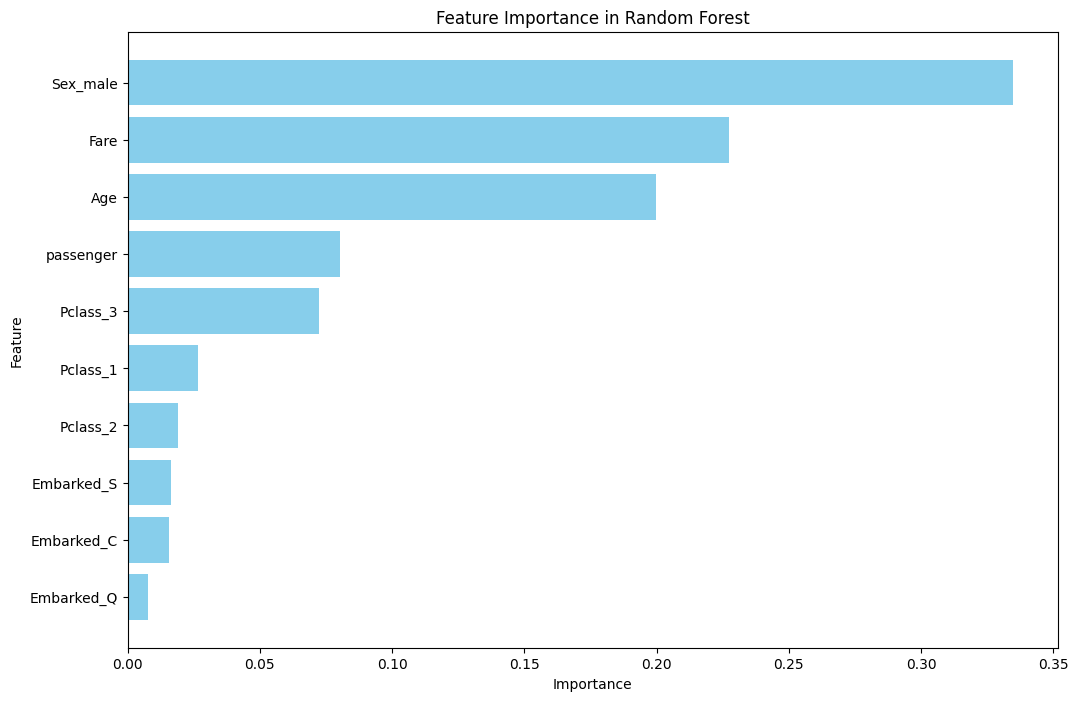

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived','Sex_female','SibSp', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 설정 및 학습
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300)
rf.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances = rf.feature_importances_
features = X.columns

# 특성 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 특성 중요도가 높은 순으로 정렬되도록 y축 반전
plt.show()

## 최종적으로 데이터 셋 저장

In [ ]:
submission_df = test_df_encoded.drop(columns=['Survived', 'PassengerId','Pclass_3','Sex_female','Embarked_C','SibSp', 'Parch'])

In [ ]:
submission_df

,Age,Fare,passenger,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.357607,2.178064,0.0,0,0,1,1,0,1,0
1,1.299600,2.079442,0.1,0,0,1,0,0,0,1
2,2.429993,2.369075,0.0,0,1,0,1,0,1,0
3,-0.207590,2.268252,0.0,0,0,1,1,0,0,1
4,-0.584387,2.586824,0.2,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0.196947,2.202765,0.0,0,0,1,1,0,0,1
414,0.696724,4.699571,0.0,1,0,0,0,1,0,0
415,0.659045,2.110213,0.0,0,0,1,1,0,0,1
416,0.196947,2.202765,0.0,0,0,1,1,0,0,1


In [ ]:
submission_predictions = rf.predict(submission_df)

In [ ]:
submission_result = pd.DataFrame({
    'PassengerId': sub_df['PassengerId'],
    'Survived': submission_predictions
})

In [ ]:
submission_result.to_csv("rf_2.csv", index = False)

In [ ]:
!kaggle competitions submit -c titanic -f rf_2.csv -m "rf"

100% 2.77k/2.77k [00:00<00:00, 6.58kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster